In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import sklearn
import sklearn.linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn_utils import *

In [61]:
file = 'dataset/Absenteeism_at_work.csv'

# Load the dataset as DataFrame in Pandas and then convert to matrix
#data = load_dataset(file)
df = pd.read_csv(file)
print('Shape of dataset is:{}'.format(df.shape))
print('Type of features is:\n{}'.format(df.dtypes))

Shape of dataset is:(740, 20)
Type of features is:
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism category               int64
dtype: object


In [62]:
col = 'Absenteeism category'
data = sample_data(df, col)


Shape of X: (740, 19)
Shape of y: (740, 1)
Before OverSampling, counts of label '1': [272]
Before OverSampling, counts of label '0': [468] 

After OverSampling, the shape of X: (936, 19)
After OverSampling, the shape of y: (936, 1) 

After OverSampling, counts of label '1': [468]
After OverSampling, counts of label '0': [468]
Size of the whole data after over sampling (936, 20)


In [63]:
# Randomly distribute data into training, testing and validation classes. We use 60-20-20 distribution
un_training_x, training_y, un_testing_x, testing_y, un_validation_x, validation_y = split_random(data, percent_train=60, percent_test=20)

# Lets normalize our X data
training_x, testing_x, validation_x = normalize_data(un_training_x, un_testing_x, un_validation_x)

# We can print the X data, to be sure that we have the normalized data in the range of -1 to 1
print("X:")
print_normalized_data(training_x, testing_x, validation_x)
print("__________________________________")


# Lets print the Y class, to be sure that we have a mix of positive and negative class
print("Y")
print_normalized_data(training_y, testing_y, validation_y)
print("__________________________________")

percent_train 60
percent_test 20
percent_validation 20
Number of training examples: m_train = 561
Number of testing examples: m_test = 187
Number of validation examples: m_validation = 188
Number of features: n_features = 19
training_x shape (19, 561)
training_y shape (1, 561)
testing_x shape (19, 187)
testing_y shape (1, 187)
validation_x shape (19, 188)
validation_y shape (1, 188)
Original Data:
[[ 28.   5.   5. ... 171.  25.   0.]
 [ 23.   4.   2. ... 178.  31.   0.]
 [ 28.   4.   4. ... 170.  31.   1.]
 ...
 [ 16.   4.   3. ... 170.  22.   0.]
 [ 23.  11.   4. ... 169.  24.   0.]
 [ 18.   8.   2. ... 170.  31.   1.]]
____________________________________________________________
X:
Training:

[[0.00273345 0.00224534 0.00273345 ... 0.00244058 0.00107386 0.0012691 ]
 [0.00139122 0.00111298 0.00111298 ... 0.00083473 0.00139122 0.00111298]
 [0.00226006 0.00090402 0.00180804 ... 0.00226006 0.00090402 0.00090402]
 ...
 [0.00165532 0.00222221 0.00201813 ... 0.00156461 0.00142856 0.00156461]

## 3 - Logistic Regression ##

here
Train accuracy:  50.445632798573975
Dev accuracy:  50.53191489361702
Test accuracy:  48.12834224598931
Confusion matrix of Testing Data:
[[ 0 97]
 [ 0 90]]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


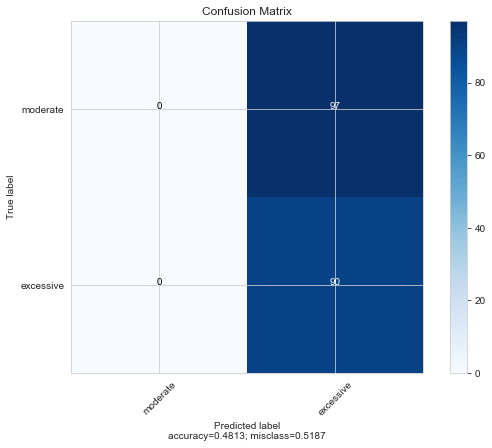

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        97
         1.0       0.48      1.00      0.65        90

   micro avg       0.48      0.48      0.48       187
   macro avg       0.24      0.50      0.32       187
weighted avg       0.23      0.48      0.31       187

Precision score: 0.23163373273470786
Recall score: 0.48128342245989303
F1 Score: 0.31274735033494855
Logistic Regression


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site

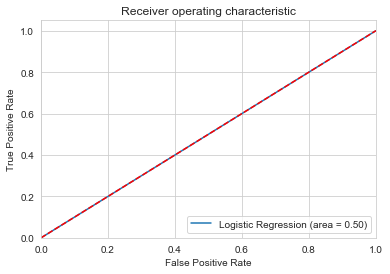

In [64]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(Cs=1, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.001,
           verbose=1.0)
clf.fit(training_x.T, training_y.T.reshape(training_x.shape[1],))
acc_dic = {}
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "lr_sklearn", None, clf, acc_dic)

In [65]:
# plot the cost
#plt.plot(clf.loss_curve_)
#plt.ylabel('cost')
#plt.xlabel('iterations (per tens)')
#plt.title("Learning rate =" + str(0.01))
#plt.show()

## 4 - Classification of data with one hidden layer Neural Network ##

here
Train accuracy:  74.50980392156863
Dev accuracy:  68.08510638297872
Test accuracy:  73.2620320855615
Confusion matrix of Testing Data:
[[88  9]
 [41 49]]


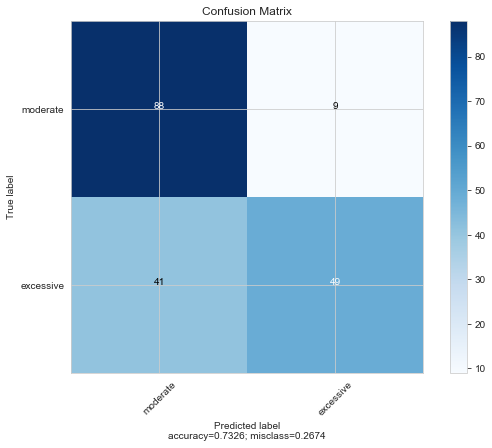

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.91      0.78        97
         1.0       0.84      0.54      0.66        90

   micro avg       0.73      0.73      0.73       187
   macro avg       0.76      0.73      0.72       187
weighted avg       0.76      0.73      0.72       187

Precision score: 0.7604546812528322
Recall score: 0.732620320855615
F1 Score: 0.7226439444034446
Shallow Neural Network


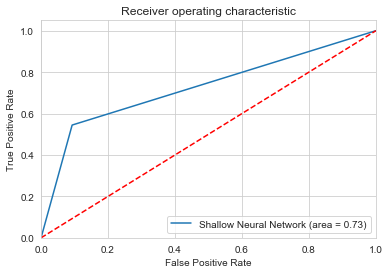

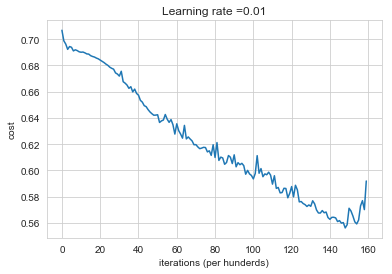

In [66]:
from sklearn.neural_network import MLPClassifier
lr=0.01
clf = MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100], learning_rate='adaptive',
       learning_rate_init=lr, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.2, verbose=False,
       warm_start=False)
    
n_features = training_x.T.shape[0]
clf.fit(training_x.T, training_y.T.reshape(n_features,))

pred = clf.predict(testing_x.T)
#print([pred])
acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "nn_sklearn", None, clf, acc_dic)

# plot the cost
plt.plot(clf.loss_curve_)
plt.ylabel('cost')
plt.xlabel('iterations (per hunderds)')
plt.title("Learning rate =" + str(lr))
plt.show()

In [67]:
print(clf.coefs_[0].shape)
w = clf.coefs_[0]
w = np.average(w, axis=1)
w = w.ravel()
print(w.shape)
print(w)

(19, 100)
(19,)
[-0.09776633 -0.00356019 -0.03673281 -0.01886047  0.05424666 -0.03091214
 -0.02374781 -0.00653228  0.0176563  -0.00622754 -0.06458969  0.01603992
  0.03603486  0.04303495  0.01622235  0.00455039  0.01156666 -0.00311318
  0.0063278 ]


(19,)
[ 0.          0.          0.          0.         26.37431629  0.
  0.          0.          8.58435993  0.          0.          7.79848694
 17.51987446 20.92326489  7.88718147  2.21236376  5.6236236   0.
  3.07652866]
Type of features is:
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index   

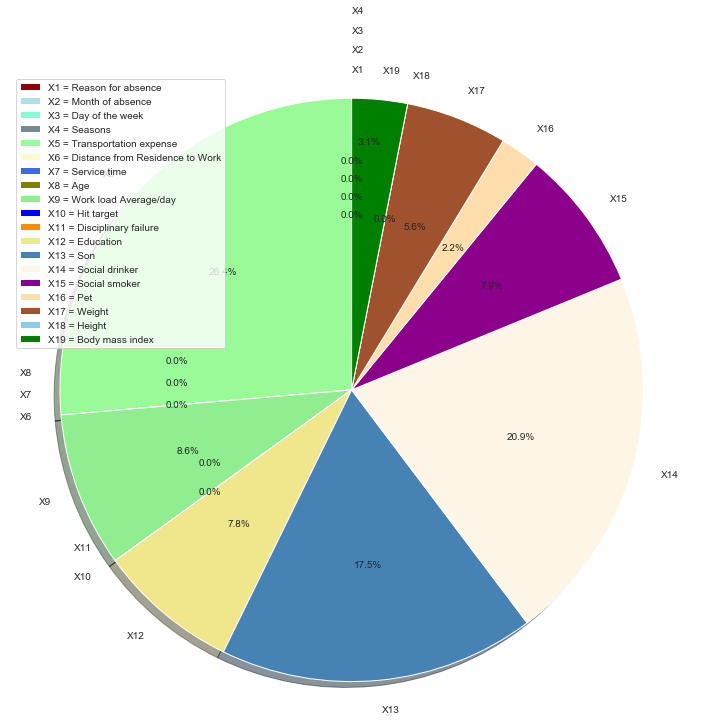

In [68]:

import collections
from collections import Counter
def fixOverLappingText(text):

    # if undetected overlaps reduce sigFigures to 1
    sigFigures = 2
    positions = [(round(item.get_position()[1],sigFigures), item) for item in text]

    overLapping = Counter((item[0] for item in positions))
    overLapping = [key for key, value in overLapping.items() if value >= 2]

    for key in overLapping:
        textObjects = [text for position, text in positions if position == key]

        if textObjects:

            # If bigger font size scale will need increasing
            scale = 0.05

            spacings = np.linspace(0,scale*len(textObjects),len(textObjects))

            for shift, textObject in zip(spacings,textObjects):
                textObject.set_y(key + shift)




w[w<0] = 0
#print(w)
w = w * 1000
#print(w)
dt = df.dtypes
s = np.sum(w)
avg = (w / s ) * 100
cs = np.sum(avg)
#print(cs)
print(avg.shape)
print(avg)
print('Type of features is:\n{}'.format(df.dtypes))

keys = []
df_dic = df.dtypes.to_dict()
i = 1
for key, value in df_dic.items() :
    keys.append('X'+str(i)+' = ' + key)
    i = i + 1
    #print (key, value)
keys.pop()
print(keys)

import matplotlib.colors as pltc
from random import sample

labels = []
for i in range(1, 20):
        l = 'X'+str(i)
        labels.append(l)
print(labels)


all_colors = [k for k,v in pltc.cnames.items()]

colors = sample(all_colors, len(avg))
plt.figure(figsize=(10,10))


    
sizes = avg
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts, junk= plt.pie(sizes, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
fixOverLappingText(texts)
fixOverLappingText(junk)
plt.legend(patches, keys, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.savefig('./results/contr_snn.pdf')
plt.show()

In [83]:
print(clf.coefs_[0].shape)
w = clf.coefs_[0]
w = np.average(w, axis=1)
w = w.ravel()
print(w.shape)
print(w)

#w[w<0] = 0
w = np.abs(w)
#print(w)
w = w * 1000
print(w)
dt = df.dtypes
s = np.sum(w)
avg = (w / s ) * 100
cs = np.sum(avg)
#print(cs)
print(avg.shape)
print(avg)

(19, 200)
(19,)
[-1.09004962e-02  1.18683101e-03  4.71635371e-03 -7.66674147e-03
 -9.57706335e-03  1.21843949e-02 -3.32166164e-03  8.49728447e-05
 -2.60234404e-03  2.61263893e-03 -2.28222835e-02 -4.42296495e-03
  5.55676893e-03 -3.49548558e-03  9.28039728e-03 -4.44289236e-03
 -3.84541075e-03  3.65858534e-03 -6.66053279e-03]
[10.90049619  1.18683101  4.71635371  7.66674147  9.57706335 12.18439492
  3.32166164  0.08497284  2.60234404  2.61263893 22.82228346  4.42296495
  5.55676893  3.49548558  9.28039728  4.44289236  3.84541075  3.65858534
  6.66053279]
(19,)
[ 9.15709365  0.99701174  3.96202998  6.44053889  8.04532789 10.23564831
  2.79040203  0.07138247  2.18613058  2.19477893 19.17213523  3.7155652
  4.66803094  2.93642494  7.79610997  3.73230546  3.2303838   3.07343886
  5.59526112]


'X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19'


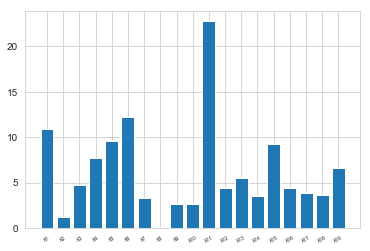

In [84]:
text = ''
for i in range(19):
    text += '\'X'+str(i)+'\','
text += '\'X19\''
print(text)
label = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19']
wl = w.tolist()
index = np.arange(len(label))
plt.bar(index, wl)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.savefig('./results/contr_snn.pdf')
plt.show()

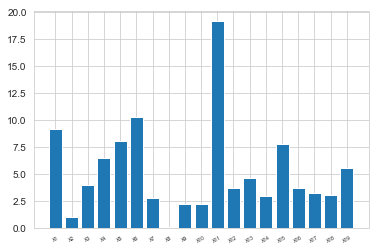

In [85]:
label = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19']
wl = avg.tolist()
index = np.arange(len(label))
plt.bar(index, wl)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.savefig('./results/contr_snn.pdf')
plt.show()

## 5 - A Deep Neural Network Model ##


here
Train accuracy:  73.79679144385027
Dev accuracy:  67.5531914893617
Test accuracy:  70.58823529411765
Confusion matrix of Testing Data:
[[86 11]
 [44 46]]


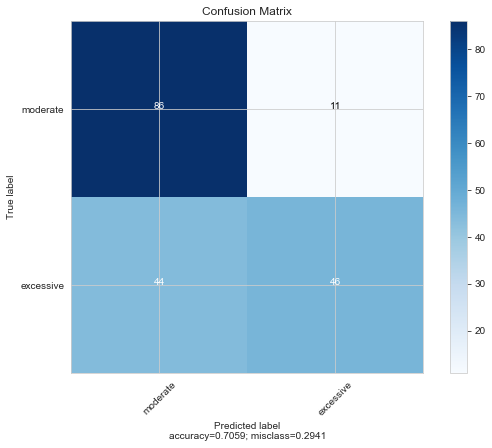

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.89      0.76        97
         1.0       0.81      0.51      0.63        90

   micro avg       0.71      0.71      0.71       187
   macro avg       0.73      0.70      0.69       187
weighted avg       0.73      0.71      0.69       187

Precision score: 0.7315551321743272
Recall score: 0.7058823529411765
F1 Score: 0.6942477431501235
Deep Neural Network


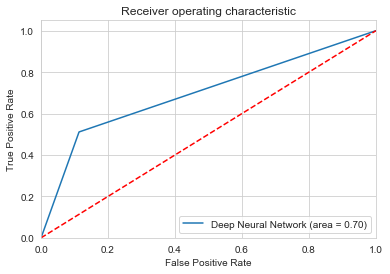

In [72]:
from sklearn.neural_network import MLPClassifier
lr = 0.001
clf = MLPClassifier(hidden_layer_sizes = [200, 150, 100, 50, 20, 5], activation='relu', 
                    alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       learning_rate='adaptive',
       learning_rate_init=lr, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.2, verbose=False,
       warm_start=False)
clf.fit(training_x.T, training_y.T.ravel())


acc_dic = analyze_results(training_x, training_y, validation_x, validation_y, testing_x, testing_y, "dnn_sklearn", None, clf, acc_dic)



In [73]:
#print("weights between input and first hidden layer:")
print(clf.coefs_[0])
w = clf.coefs_[0]
w = np.average(w, axis=1)
w = w.ravel()
print(w.shape)
print(w)



[[-0.03969161  0.06971805  0.05785366 ...  0.12563334  0.07514915
   0.08854392]
 [ 0.0449344  -0.13181257 -0.11504714 ... -0.02246408  0.06873099
   0.08052945]
 [-0.12555927  0.10524628 -0.00608538 ... -0.10366781 -0.11593639
  -0.1452549 ]
 ...
 [ 0.01688499  0.0033898  -0.09765582 ...  0.10910658 -0.07975893
   0.02426626]
 [-0.13690678 -0.12677062  0.15843846 ...  0.0166607  -0.03922493
   0.0511465 ]
 [-0.11350572  0.02103069 -0.10165692 ... -0.12551462 -0.10705247
   0.02150496]]
(19,)
[-1.09004962e-02  1.18683101e-03  4.71635371e-03 -7.66674147e-03
 -9.57706335e-03  1.21843949e-02 -3.32166164e-03  8.49728447e-05
 -2.60234404e-03  2.61263893e-03 -2.28222835e-02 -4.42296495e-03
  5.55676893e-03 -3.49548558e-03  9.28039728e-03 -4.44289236e-03
 -3.84541075e-03  3.65858534e-03 -6.66053279e-03]


[-1.09004962e-02  1.18683101e-03  4.71635371e-03 -7.66674147e-03
 -9.57706335e-03  1.21843949e-02 -3.32166164e-03  8.49728447e-05
 -2.60234404e-03  2.61263893e-03 -2.28222835e-02 -4.42296495e-03
  5.55676893e-03 -3.49548558e-03  9.28039728e-03 -4.44289236e-03
 -3.84541075e-03  3.65858534e-03 -6.66053279e-03]


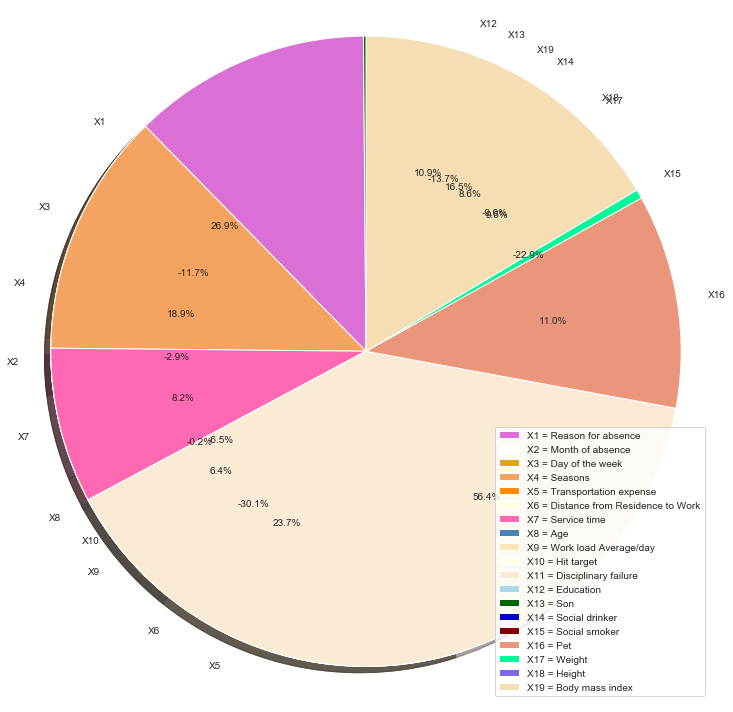

In [74]:



import collections
from collections import Counter
def fixOverLappingText(text):

    # if undetected overlaps reduce sigFigures to 1
    sigFigures = 2
    positions = [(round(item.get_position()[1],sigFigures), item) for item in text]

    overLapping = Counter((item[0] for item in positions))
    overLapping = [key for key, value in overLapping.items() if value >= 2]

    for key in overLapping:
        textObjects = [text for position, text in positions if position == key]

        if textObjects:

            # If bigger font size scale will need increasing
            scale = 0.05

            spacings = np.linspace(0,scale*len(textObjects),len(textObjects))

            for shift, textObject in zip(spacings,textObjects):
                textObject.set_y(key + shift)



import matplotlib.colors as pltc
from random import sample

#w[w>0] = 0
print(w)
#w = np.abs(w)
#print(w)
w = w * 1000
dt = df.dtypes
s = np.sum(w)
avg = (w / s ) * 100
#print('Type of features is:\n{}'.format(df.dtypes))

keys = []
df_dic = df.dtypes.to_dict()
i = 1
for key, value in df_dic.items() :
    keys.append('X'+str(i)+' = ' + key)
    i = i + 1
    #print (key, value)
keys.pop()

labels = []
for i in range(1, 22):
        l = 'X'+str(i)
        labels.append(l)

avg1 = []
keys1 = []
labels1 = []
for i in range(len(avg)):
    if avg[i] != 0.0:
        avg1.append(avg[i])
        keys1.append(keys[i])
        labels1.append(labels[i])

all_colors = [k for k,v in pltc.cnames.items()]
colors = sample(all_colors, len(avg))

plt.figure(figsize=(10,10))    
sizes = avg1
patches, texts, junk= plt.pie(sizes, colors=colors, labels=labels1, autopct="%1.1f%%", shadow=True, startangle=90)
fixOverLappingText(texts)
fixOverLappingText(junk)
plt.legend(patches, keys1, loc='best')
plt.axis('equal')
plt.tight_layout()
plt.savefig('./results/contr_dnn.pdf')
plt.show()


In [75]:
# plot the cost
#plt.plot(clf.loss_curve_)
#plt.ylabel('cost')
#plt.xlabel('iterations (per tens)')
#plt.title("Learning rate =" + str(0.01))
#plt.show()

'X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19'


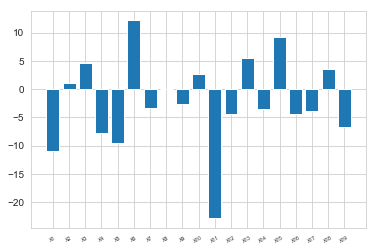

In [76]:
text = ''
for i in range(19):
    text += '\'X'+str(i)+'\','
text += '\'X19\''
print(text)
label = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19']
wl = w.tolist()
index = np.arange(len(label))
plt.bar(index, wl)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.show()

(2, 6)
[[74.50980392 68.08510638 73.26203209  0.76045468  0.73262032  0.72264394]
 [73.79679144 67.55319149 70.58823529  0.73155513  0.70588235  0.69424774]]
[[74.50980392 68.08510638 73.26203209]
 [73.79679144 67.55319149 70.58823529]]
[[74.50980392 68.08510638 73.26203209]
 [93.79679144 87.55319149 90.58823529]]
[[0.76045468 0.73262032 0.72264394]
 [0.93015513 0.90448235 0.89284774]]



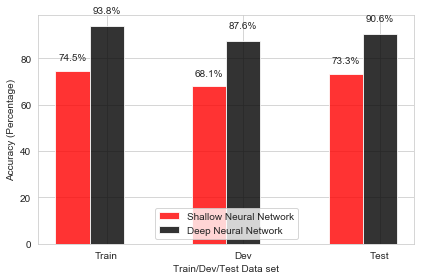

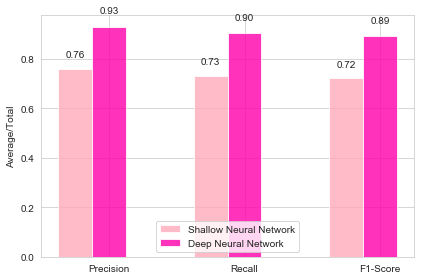

In [80]:
#print(acc_dic)
show_barchart(acc_dic)